In [1]:
import numpy as np
import pandas as pd


In [2]:
df = pd.read_csv('resources/afad_10_25.csv')

df

,eventId,eventDate,longitude,latitude,depth,magnitudeType,magnitude,area
0,650304,2025-01-30T04:36:21,23.55750,36.27250,7.01,ML,3.3,Ege Denizi
1,650301,2025-01-30T04:24:03,26.19056,36.25111,40.28,ML,3.2,Ege Denizi - [122.90 km] Datça (Muğla)
2,650290,2025-01-30T01:37:44,27.10528,36.66722,36.47,ML,3.3,Ege Denizi - [30.71 km] Datça (Muğla)
3,650280,2025-01-29T22:54:26,45.35611,34.65583,24.90,ML,3.7,"Kalar, Süleymaniye (Irak)"
4,650206,2025-01-29T01:44:52,37.88556,38.11778,15.28,ML,3.5,Doğanşehir (Malatya)
...,...,...,...,...,...,...,...,...
30306,96959,2010-01-01T11:03:11,40.82130,39.35750,7.02,Md,3.0,Karlıova (Bingöl)
30307,96951,2010-01-01T07:33:28,29.59470,36.90350,7.63,Md,3.1,Seydikemer (Muğla)
30308,96949,2010-01-01T05:37:55,27.59030,35.44590,5.00,Md,3.8,Akdeniz - [139.13 km] Datça (Muğla)
30309,96944,2010-01-01T01:28:03,28.64970,35.52280,16.09,Md,3.3,Akdeniz - [103.13 km] Kaş (Antalya)


In [3]:
df.drop(columns=["area"], inplace=True)


In [4]:
from datetime import datetime

def parse_dt_to_date(df):
    # convert the eventDate column to two separate columns: date and time
    df["date"] = df["eventDate"].apply(lambda x: x.split("T")[0])
    df["time"] = df["eventDate"].apply(lambda x: x.split("T")[1])
    return df

df = parse_dt_to_date(df)
df


,eventId,eventDate,longitude,latitude,depth,magnitudeType,magnitude,date,time
0,650304,2025-01-30T04:36:21,23.55750,36.27250,7.01,ML,3.3,2025-01-30,04:36:21
1,650301,2025-01-30T04:24:03,26.19056,36.25111,40.28,ML,3.2,2025-01-30,04:24:03
2,650290,2025-01-30T01:37:44,27.10528,36.66722,36.47,ML,3.3,2025-01-30,01:37:44
3,650280,2025-01-29T22:54:26,45.35611,34.65583,24.90,ML,3.7,2025-01-29,22:54:26
4,650206,2025-01-29T01:44:52,37.88556,38.11778,15.28,ML,3.5,2025-01-29,01:44:52
...,...,...,...,...,...,...,...,...,...
30306,96959,2010-01-01T11:03:11,40.82130,39.35750,7.02,Md,3.0,2010-01-01,11:03:11
30307,96951,2010-01-01T07:33:28,29.59470,36.90350,7.63,Md,3.1,2010-01-01,07:33:28
30308,96949,2010-01-01T05:37:55,27.59030,35.44590,5.00,Md,3.8,2010-01-01,05:37:55
30309,96944,2010-01-01T01:28:03,28.64970,35.52280,16.09,Md,3.3,2010-01-01,01:28:03


In [5]:
df.drop(columns=["eventDate"], inplace=True)

# Check the missing values
df.isnull().sum()


eventId          0
longitude        0
latitude         0
depth            0
magnitudeType    0
magnitude        0
date             0
time             0
dtype: int64

In [6]:
df.drop(columns=["magnitudeType"], inplace=True)

In [7]:
df["date"] = pd.to_datetime(df["date"])


In [8]:
df["date"] = df["date"].apply(lambda x: x.date())

In [9]:
df


,eventId,longitude,latitude,depth,magnitude,date,time
0,650304,23.55750,36.27250,7.01,3.3,2025-01-30,04:36:21
1,650301,26.19056,36.25111,40.28,3.2,2025-01-30,04:24:03
2,650290,27.10528,36.66722,36.47,3.3,2025-01-30,01:37:44
3,650280,45.35611,34.65583,24.90,3.7,2025-01-29,22:54:26
4,650206,37.88556,38.11778,15.28,3.5,2025-01-29,01:44:52
...,...,...,...,...,...,...,...
30306,96959,40.82130,39.35750,7.02,3.0,2010-01-01,11:03:11
30307,96951,29.59470,36.90350,7.63,3.1,2010-01-01,07:33:28
30308,96949,27.59030,35.44590,5.00,3.8,2010-01-01,05:37:55
30309,96944,28.64970,35.52280,16.09,3.3,2010-01-01,01:28:03


Cluster 0 mean latitude: 41.84623861556064, mean longitude: 42.918367151029756
Cluster 1 mean latitude: 37.05889531199352, mean longitude: 36.59037721231766
Cluster 2 mean latitude: 39.10026335180055, mean longitude: 28.972795623268702
Cluster 3 mean latitude: 38.68085496514161, mean longitude: 43.25162258605664
Cluster 4 mean latitude: 38.15868285685155, mean longitude: 37.678393941680255
Cluster 5 mean latitude: 34.96751443452381, mean longitude: 26.345315595238095
Cluster 6 mean latitude: 37.463150103333334, mean longitude: 27.833414553333334
Cluster 7 mean latitude: 40.57627879810938, mean longitude: 26.52395452397029
Cluster 8 mean latitude: 36.21770642266824, mean longitude: 28.329011078315624
Cluster 9 mean latitude: 40.619476056818186, mean longitude: 34.157357136363636
Cluster 10 mean latitude: 36.21385003134797, mean longitude: 43.454082131661444
Cluster 11 mean latitude: 39.67758428674352, mean longitude: 40.46457512247839
Cluster 12 mean latitude: 39.082378815269855, mean l

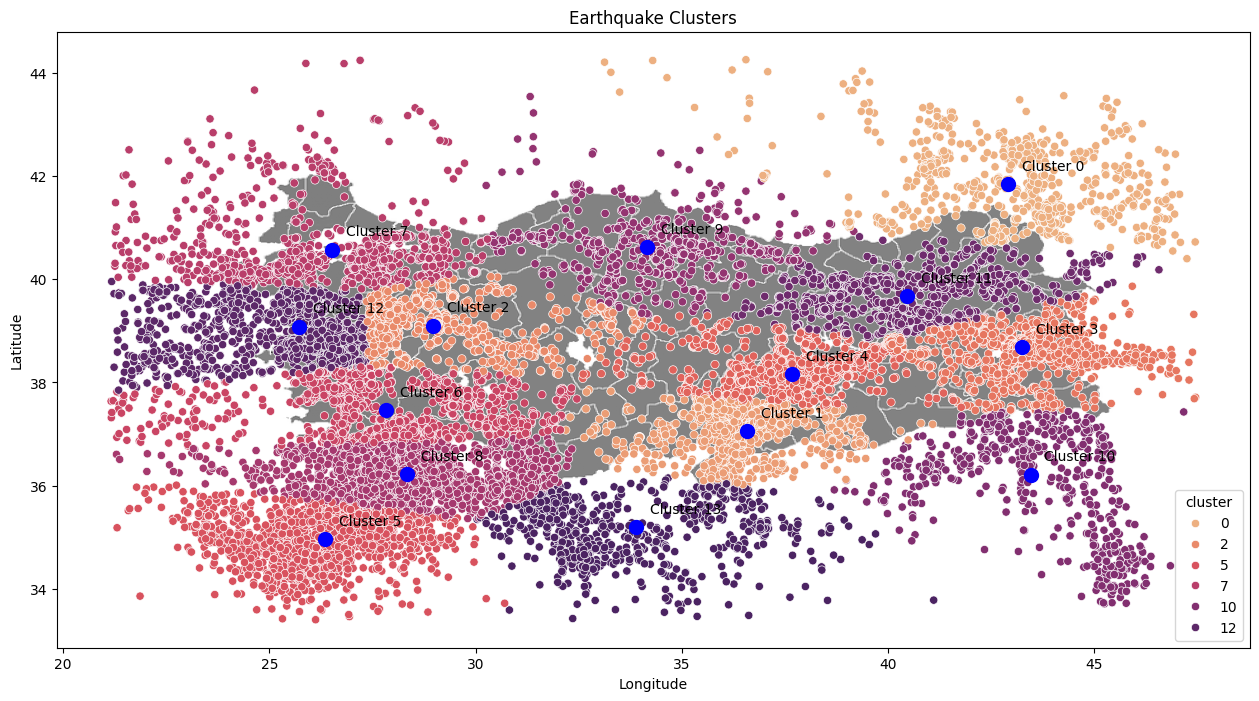

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

df_copy = df.copy()

num_clusters = 14

# Order by the time descending
df_copy = df_copy.sort_values(by="date", ascending=False)
latest_earthquakes = df_copy

# Use KNN to cluster the earthquakes based on their coordinates
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# We will use the latitude and longitude columns
X = latest_earthquakes[["latitude", "longitude"]]
scaler = StandardScaler()
X = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=num_clusters, random_state=42)
latest_earthquakes["cluster"] = kmeans.fit_predict(X)

# Plot the clusters
fig, ax = plt.subplots(figsize=(16, 8))

# Read and display the map
img = plt.imread("resources/turkey_map.png")

# Define the geographical boundaries of Turkey
# Adjusted extent to stretch horizontally and compress vertically
extent = [24, 45.5, 35.5, 42.5]  # Shifted slightly west and adjusted latitude range

# Display the map with correct extent and aspect
ax.imshow(img, extent=extent, aspect=1.25, cmap="gray")  # Increased aspect ratio for horizontal stretch

sns.scatterplot(data=latest_earthquakes, x="longitude", y="latitude", hue="cluster", palette="flare")

cluster_mean_lat = []
cluster_mean_lon = []

for i in range(num_clusters):
    cluster_mean_lat.append(latest_earthquakes[latest_earthquakes["cluster"] == i]["latitude"].mean())
    cluster_mean_lon.append(latest_earthquakes[latest_earthquakes["cluster"] == i]["longitude"].mean())

for i in range(num_clusters):
    print(f"Cluster {i} mean latitude: {cluster_mean_lat[i]}, mean longitude: {cluster_mean_lon[i]}")

# Plot cluster centers
for i in range(num_clusters):
    plt.plot(cluster_mean_lon[i], cluster_mean_lat[i], 'b.', markersize=20, label=f'Cluster {i} Center')
    plt.annotate(f'Cluster {i}', (cluster_mean_lon[i], cluster_mean_lat[i]), 
                xytext=(10, 10), textcoords='offset points')

plt.title("Earthquake Clusters")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

In [11]:
def find_cluster(lat: float, lon: float, clusters_mean_lat: list, clusters_mean_lon: list):    
    min_dist = 1000000
    cluster = -1
    for i in range(num_clusters):
        dist = np.sqrt((lat - clusters_mean_lat[i])**2 + (lon - clusters_mean_lon[i])**2)
        if dist < min_dist:
            min_dist = dist
            cluster = i
    return cluster

df_copy = df.copy()

recent_eq_data = df_copy.sort_values(by="time", ascending=False)

recent_eq_data["cluster"] = recent_eq_data.apply(lambda x: find_cluster(x["latitude"], x["longitude"], cluster_mean_lat, cluster_mean_lon), axis=1)

In [12]:
df = recent_eq_data.copy()

starting_date = df["date"].min()
ending_date = df["date"].max()

cutoff_year = (ending_date.year-starting_date.year)*0.15
cutoff_year = np.ceil(cutoff_year)

cutoff_date = ending_date - pd.DateOffset(years=cutoff_year)
cutoff_date = cutoff_date.date()

training_df = df[df["date"] <= cutoff_date]

# Move cutoff date back 2 years to ensure enough time series data
cutoff_date = cutoff_date - pd.DateOffset(years=3)
cutoff_date = cutoff_date.date()

testing_df = df[df["date"] > cutoff_date]

training_df


,eventId,longitude,latitude,depth,magnitude,date,time,cluster
17217,203957,30.6215,38.4390,6.95,3.8,2013-09-07,23:59:44,2
30060,98311,31.3468,36.2180,7.01,3.0,2010-01-28,23:59:33,13
14215,343635,38.6791,34.6508,9.21,3.0,2016-07-14,23:59:29,1
28801,106042,33.0872,39.4420,4.53,3.0,2010-06-03,23:59:28,9
18119,191247,38.2097,36.9240,6.95,3.0,2013-04-12,23:59:15,4
...,...,...,...,...,...,...,...,...
22524,150324,43.5742,38.8953,6.15,3.1,2011-12-06,00:00:18,3
7766,506546,23.3013,38.4925,6.34,4.3,2021-07-11,00:00:17,12
17643,197772,25.0068,34.0081,10.71,4.1,2013-06-19,00:00:14,5
24124,143005,43.1530,38.6297,19.49,3.9,2011-10-27,00:00:10,3


In [13]:
training_df["cluster"].value_counts()


cluster
3     4203
2     2791
12    2441
8     2327
6     2200
5     1683
4     1470
11    1354
1     1185
7      846
9      808
0      712
13     660
10     544
Name: count, dtype: int64

In [14]:
cluster_dfs = {}
for i in range(num_clusters):
    cluster_dfs[i] = training_df[training_df["cluster"] == i]
    

In [15]:
from analysis_utils import EarthquakeAnalysisUtils

for k,v in cluster_dfs.items():
    eq_utils_manager = EarthquakeAnalysisUtils(v)
    cluster_dfs[k] = eq_utils_manager.shape_raw_data()



/Users/berkaybgk/Desktop/cs-related/python_files/datamata/earthquake/analysis_utils.py:73: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  result_df = result_df.fillna(method='ffill')
/Users/berkaybgk/Desktop/cs-related/python_files/datamata/earthquake/analysis_utils.py:73: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  result_df = result_df.fillna(method='ffill')
/Users/berkaybgk/Desktop/cs-related/python_files/datamata/earthquake/analysis_utils.py:73: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  result_df = result_df.fillna(method='ffill')
/Users/berkaybgk/Desktop/cs-related/python_files/datamata/earthquake/analysis_utils.py:73: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future 

In [16]:

merged_df = pd.concat([df.assign(cluster=k) for k, df in cluster_dfs.items()])

merged_df.sort_index(inplace=True)

merged_df


,week_before_count,week_before_avg_magnitude,week_before_max_magnitude,week_before_count_lt_5,week_before_count_gt_5,week_before_avg_depth,week_before_max_eq_depth,week_before_days_since_max,two_weeks_before_count,two_weeks_before_avg_magnitude,...,year_before_days_since_max,three_years_before_count,three_years_before_avg_magnitude,three_years_before_max_magnitude,three_years_before_count_lt_5,three_years_before_count_gt_5,three_years_before_avg_depth,three_years_before_max_eq_depth,three_years_before_days_since_max,cluster
2013-01-06,7.0,3.142857,3.3,7.0,0.0,7.012857,7.12,4.0,53.0,3.396226,...,14.0,374.0,3.294920,5.5,369.0,5.0,9.629572,13.42,14.0,0
2013-01-06,4.0,3.075000,3.1,4.0,0.0,13.502500,7.05,3.0,7.0,3.214286,...,106.0,612.0,3.279412,5.1,608.0,4.0,15.470212,21.16,106.0,12
2013-01-06,1.0,3.300000,3.3,1.0,0.0,15.690000,15.69,4.0,5.0,3.280000,...,253.0,828.0,3.250242,5.8,821.0,7.0,9.957766,5.01,1035.0,11
2013-01-06,2.0,3.200000,3.4,2.0,0.0,3.615000,2.23,3.0,3.0,3.200000,...,206.0,222.0,3.361712,5.6,219.0,3.0,9.492162,21.61,437.0,10
2013-01-06,2.0,3.100000,3.2,2.0,0.0,3.885000,3.34,3.0,5.0,3.300000,...,93.0,437.0,3.195423,4.8,437.0,0.0,9.600526,19.20,1010.0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-30,0.0,0.000000,0.0,0.0,0.0,0.000000,0.00,7.0,2.0,3.100000,...,270.0,107.0,3.428972,5.8,106.0,1.0,10.271402,7.97,857.0,7
2022-01-30,1.0,3.400000,3.4,1.0,0.0,5.920000,5.92,5.0,21.0,3.533333,...,333.0,445.0,3.588090,6.2,429.0,16.0,12.171191,3.08,333.0,12
2022-01-30,2.0,3.350000,3.5,2.0,0.0,7.440000,7.90,3.0,6.0,3.700000,...,74.0,456.0,3.443860,6.0,450.0,6.0,10.040570,10.92,906.0,2
2022-01-30,0.0,0.000000,0.0,0.0,0.0,0.000000,0.00,7.0,0.0,0.000000,...,299.0,67.0,3.761194,5.2,65.0,2.0,12.164627,11.76,369.0,10


In [17]:
test_cluster_dfs = {}
for i in range(num_clusters):
    test_cluster_dfs[i] = testing_df[testing_df["cluster"] == i]
    

In [18]:
for k,v in test_cluster_dfs.items():
    eq_utils_manager = EarthquakeAnalysisUtils(v)
    test_cluster_dfs[k] = eq_utils_manager.shape_raw_data()
    

/Users/berkaybgk/Desktop/cs-related/python_files/datamata/earthquake/analysis_utils.py:73: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  result_df = result_df.fillna(method='ffill')
/Users/berkaybgk/Desktop/cs-related/python_files/datamata/earthquake/analysis_utils.py:73: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  result_df = result_df.fillna(method='ffill')
/Users/berkaybgk/Desktop/cs-related/python_files/datamata/earthquake/analysis_utils.py:73: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  result_df = result_df.fillna(method='ffill')
/Users/berkaybgk/Desktop/cs-related/python_files/datamata/earthquake/analysis_utils.py:73: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future 

In [21]:
merged_test_df = pd.concat([df.assign(cluster=k) for k, df in test_cluster_dfs.items()])

merged_test_df.sort_index(inplace=True)

merged_df

,week_before_count,week_before_avg_magnitude,week_before_max_magnitude,week_before_count_lt_5,week_before_count_gt_5,week_before_avg_depth,week_before_max_eq_depth,week_before_days_since_max,two_weeks_before_count,two_weeks_before_avg_magnitude,...,year_before_days_since_max,three_years_before_count,three_years_before_avg_magnitude,three_years_before_max_magnitude,three_years_before_count_lt_5,three_years_before_count_gt_5,three_years_before_avg_depth,three_years_before_max_eq_depth,three_years_before_days_since_max,cluster
2013-01-06,7.0,3.142857,3.3,7.0,0.0,7.012857,7.12,4.0,53.0,3.396226,...,14.0,374.0,3.294920,5.5,369.0,5.0,9.629572,13.42,14.0,0
2013-01-06,4.0,3.075000,3.1,4.0,0.0,13.502500,7.05,3.0,7.0,3.214286,...,106.0,612.0,3.279412,5.1,608.0,4.0,15.470212,21.16,106.0,12
2013-01-06,1.0,3.300000,3.3,1.0,0.0,15.690000,15.69,4.0,5.0,3.280000,...,253.0,828.0,3.250242,5.8,821.0,7.0,9.957766,5.01,1035.0,11
2013-01-06,2.0,3.200000,3.4,2.0,0.0,3.615000,2.23,3.0,3.0,3.200000,...,206.0,222.0,3.361712,5.6,219.0,3.0,9.492162,21.61,437.0,10
2013-01-06,2.0,3.100000,3.2,2.0,0.0,3.885000,3.34,3.0,5.0,3.300000,...,93.0,437.0,3.195423,4.8,437.0,0.0,9.600526,19.20,1010.0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-30,0.0,0.000000,0.0,0.0,0.0,0.000000,0.00,7.0,2.0,3.100000,...,270.0,107.0,3.428972,5.8,106.0,1.0,10.271402,7.97,857.0,7
2022-01-30,1.0,3.400000,3.4,1.0,0.0,5.920000,5.92,5.0,21.0,3.533333,...,333.0,445.0,3.588090,6.2,429.0,16.0,12.171191,3.08,333.0,12
2022-01-30,2.0,3.350000,3.5,2.0,0.0,7.440000,7.90,3.0,6.0,3.700000,...,74.0,456.0,3.443860,6.0,450.0,6.0,10.040570,10.92,906.0,2
2022-01-30,0.0,0.000000,0.0,0.0,0.0,0.000000,0.00,7.0,0.0,0.000000,...,299.0,67.0,3.761194,5.2,65.0,2.0,12.164627,11.76,369.0,10
